In [1]:
# this lets us use the figures interactively
%matplotlib inline

#imports needed for project
import pandas as pd
import geopandas as gpd
import folium
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import rasterio as rio
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt



In [2]:
#shapefiles that will be used for the project
greenspaces = gpd.read_file('datafiles/Greenspace_NI.shp')
wards = gpd.read_file('datafiles/NI_Wards.shp')
greenways = gpd.read_file('datafiles/greenways_belfast.shp')
belfast = gpd.read_file('datafiles/belfast_outline.shp')

In [3]:
# convert all shapefiles into epsg 29902
greenspaces = greenspaces.to_crs(epsg=29902)
wards = wards.to_crs(epsg=29902)
greenways = greenways.to_crs(epsg=29902)
belfast = belfast.to_crs(epsg=29902)


In [4]:
# creating a Universal Transverse Mercator reference system to ensure data is on the correct coordinate reference system
ni_utm = ccrs.UTM(29)

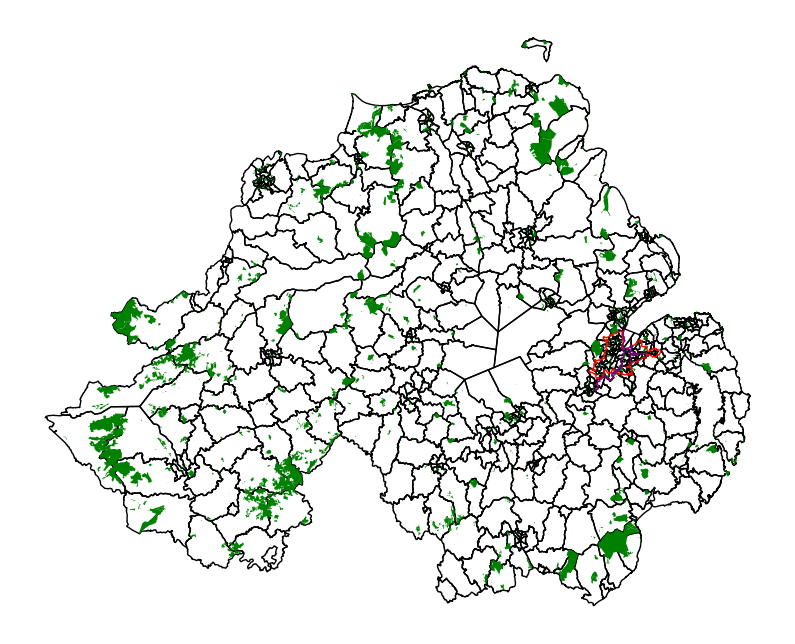

In [5]:
# to show all shapefiles have successfully loaded in the correct coordinate system we will create a static image with the shapefiles
#set up the plot with a specific size
myfig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ni_utm})

# each shapefile plotted on map, showing colour and label
wards.plot(ax=ax, color='none', edgecolor='black', label='Wards')
greenspaces.plot(ax=ax, color='green', label='Green Spaces')
greenways.plot(ax=ax, color='purple', label='Greenways', linewidth=1)
belfast.plot(ax=ax, color='none', edgecolor='red', linewidth=1, label='Belfast Outline')

#remove axis from the image
ax.set_axis_off()


# show the static map image
plt.show()

In [6]:
#this shows that all shapefiles have been import successfully and will be saved for reference 
myfig.savefig('staticmap', bbox_inches='tight', dpi=300)

In [9]:
#calculate the total area of greenspaces in Northern Ireland
sum_greenspaces = greenspaces['Area_Ha'].sum()

#print the total area
print(sum_greenspaces)

85818.3144534194
